In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [235]:
data = pd.read_csv('/content/student_scores - student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [207]:
data.shape

(25, 2)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [209]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [210]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [211]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

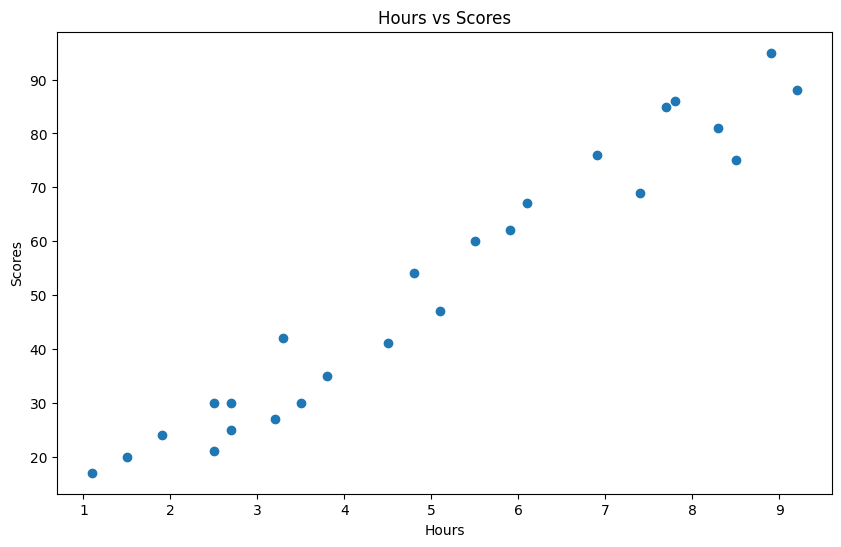

In [212]:
plt.subplots(figsize=(10,6))

plt.scatter(x=data.Hours , y=data.Scores )
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [213]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

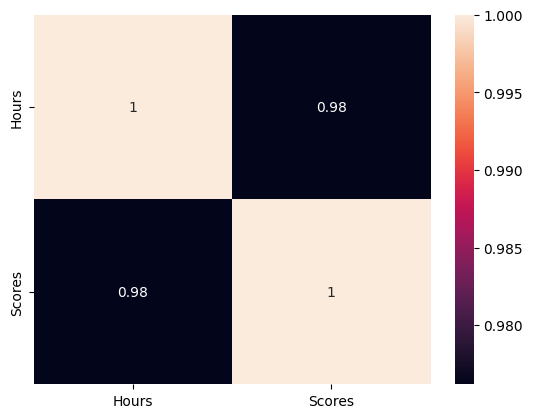

In [214]:
sns.heatmap(data.corr() , annot=True)

<Axes: xlabel='Hours', ylabel='count'>

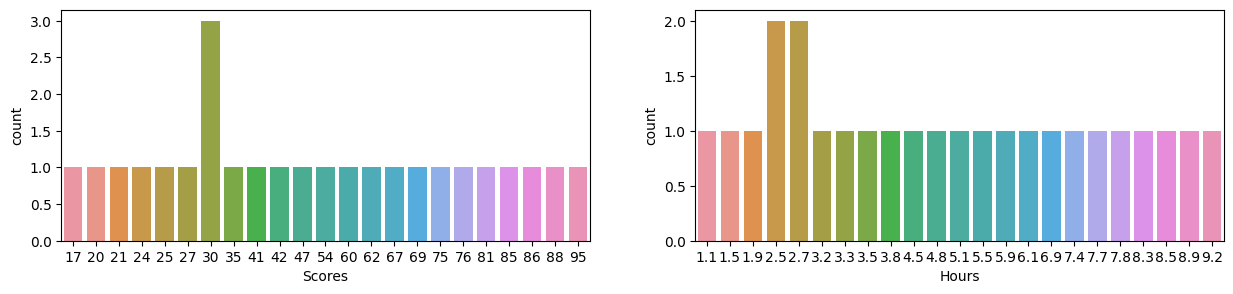

In [215]:
plt.subplots(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(x=data.Scores)
plt.subplot(1,2,2)
sns.countplot(x=data.Hours)

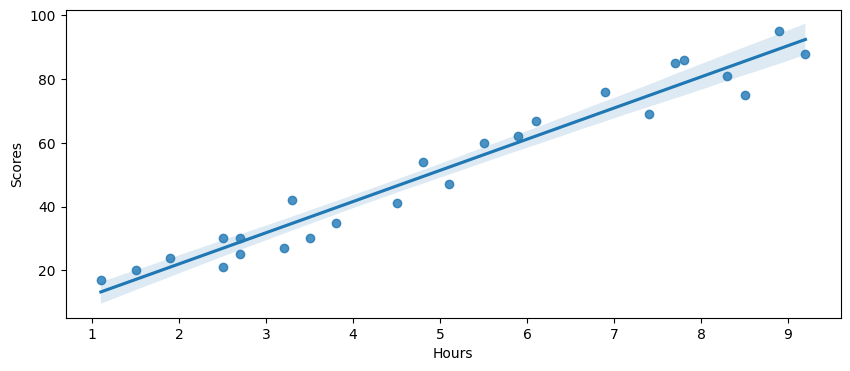

In [216]:
plt.subplots(figsize=(10,4))
sns.regplot(x='Hours' , y='Scores' , data=data)
plt.show()

<Axes: xlabel='Hours', ylabel='Density'>

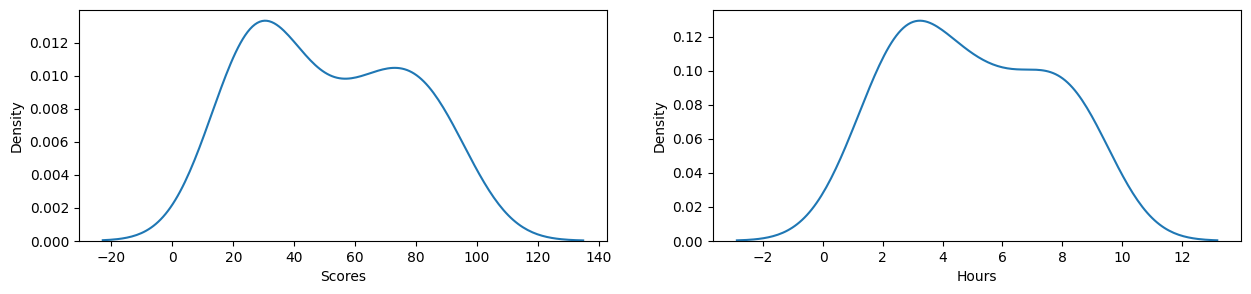

In [217]:
plt.subplots(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(x=data.Scores)
plt.subplot(1,2,2)
sns.kdeplot(x=data.Hours)

<Axes: ylabel='Density'>

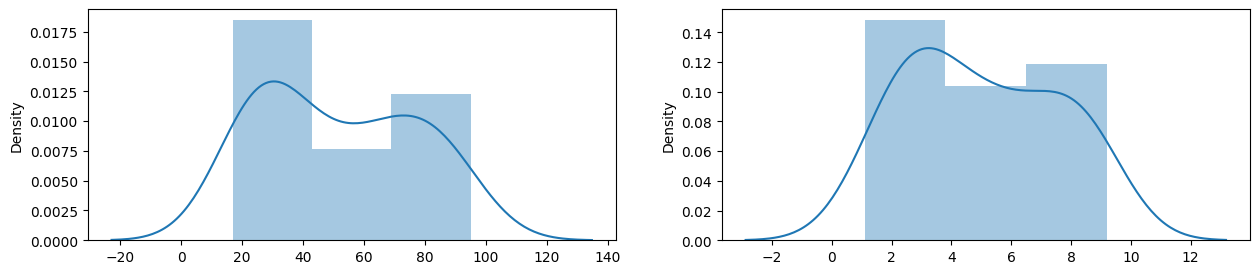

In [218]:
plt.subplots(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(x=data.Scores)
plt.subplot(1,2,2)
sns.distplot(x=data.Hours)

In [219]:
data['Hours'].unique() , data['Scores'].unique()

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
        67, 69, 54, 35, 76, 86]))

In [220]:
x = data[['Hours']]
y = data[['Scores']]

In [221]:
X_train , X_test , y_train , y_test = train_test_split(x,y , test_size = 0.3)

In [222]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((17, 1), (8, 1), (17, 1), (8, 1))

In [223]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [224]:
reg.score(X_train , y_train)

0.9651952693315531

In [225]:
reg.score(X_test , y_test)

0.9236439748860944

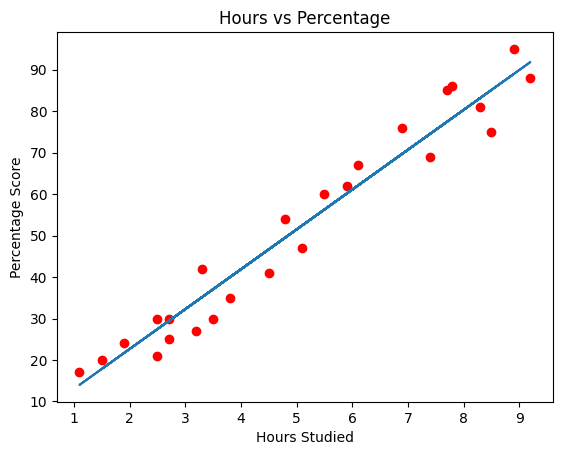

In [226]:
line = reg.coef_ * x + reg.intercept_
plt.scatter(x,y , color='Red')
plt.plot(x,line)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()


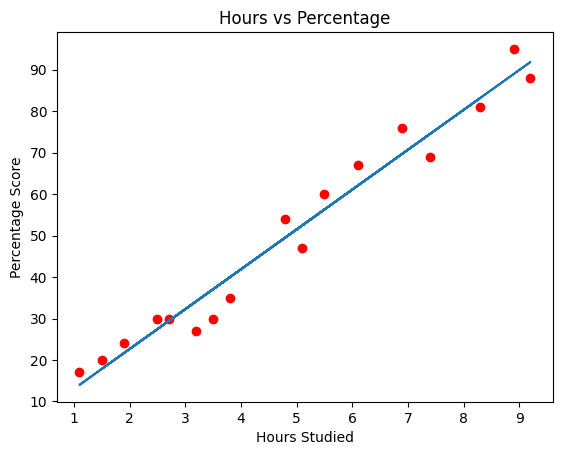

In [227]:
plt.scatter(X_train,y_train , color='Red')
plt.plot(X_train,reg.predict(X_train))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()


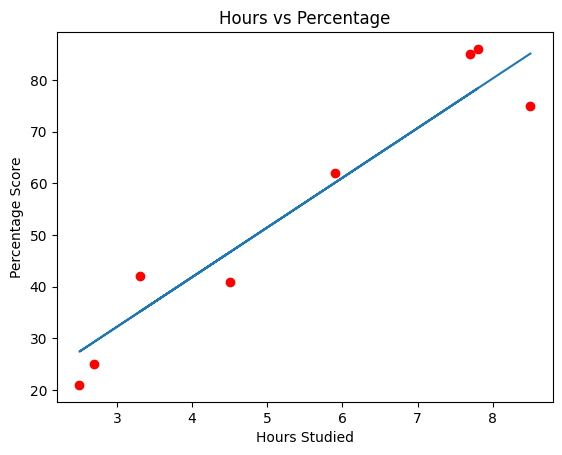

In [228]:
plt.scatter(X_test,y_test , color='Red')
plt.plot(X_test,reg.predict(X_test))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()


In [229]:
y_pred = reg.predict(X_test)

In [248]:
print("The student who studied for 9.25 hrs has a score percentage of" , reg.predict([[9.25]])[0] )

The student who studied for 9.25 hrs has a score percentage of [92.30760306]


In [236]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 6.317735240841178
Mean Squared Error: 45.14430678570428
Root Mean Squared Error: 6.718951315920088
